In [26]:
import pandas as pd
import numpy as np
import zipfile
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

Load in your data

In [27]:

# Path to your CSV file
csv_file_path = r"/content/NBA_players_clean.csv"
df = pd.read_csv(csv_file_path)


#Use df head command

In [28]:
df.head()

,Player,From,To,Years,Pos,Ht,Height,Wt,G,PTS,...,Sixth Man,DPOY,ROY,AS MVP,CF MVP,Finals MVP,MVP,Championships,NBA 75 Team,ABA All-Time Team
0,Alaa Abdelnaby,1991,1995,5,F-C,10-Jun,6.833333,240.0,256,5.7,...,0,0,0,0,0,0,0,0,0,0
1,Zaid Abdul-Aziz,1969,1978,10,F-C,9-Jun,6.750000,235.0,505,9.0,...,0,0,0,0,0,0,0,0,0,0
2,Kareem Abdul-Jabbar*,1970,1989,20,C,2-Jul,7.166667,225.0,1560,24.6,...,0,0,1,0,0,2,6,6,1,0
3,Mahmoud Abdul-Rauf,1991,2001,11,G,1-Jun,6.083333,162.0,586,14.6,...,0,0,0,0,0,0,0,0,0,0
4,Tariq Abdul-Wahad,1998,2003,6,F,6-Jun,6.500000,223.0,236,7.8,...,0,0,0,0,0,0,0,0,0,0


Check for each column in the dataset

In [29]:
columns = df.columns
print ("columns in the dataset")
for i in columns :
 print (i)

columns in the dataset
Player
From
To
Years
Pos
Ht
Height
Wt
G
PTS
TRB
AST
FG%
FG3%
FT%
eFG%
PER
WS
All Star
All NBA
All ABA
All Rookie
All Defensive
BLK Champ
STL Champ
TRB Champ
AST Champ
Scoring Champ
Most Improved
Sixth Man
DPOY
ROY
AS MVP
CF MVP
Finals MVP
MVP
Championships
NBA 75 Team
ABA All-Time Team


In [30]:
print(df[df['MVP'] > 1])

                     Player  From    To  Years  Pos      Ht    Height     Wt  \
2      Kareem Abdul-Jabbar*  1970  1989     20    C   2-Jul  7.166667  225.0   
116   Giannis Antetokounmpo  2014  2022      9  G-F  11-Jun  6.916667  242.0   
358             Larry Bird*  1980  1992     13    F   9-Jun  6.750000  220.0   
748       Wilt Chamberlain*  1960  1973     14    C   1-Jul  7.083333  275.0   
961           Stephen Curry  2010  2022     13    G   2-Jun  6.166667  185.0   
976            Mel Daniels*  1968  1977     10    C   9-Jun  6.750000  220.0   
1192            Tim Duncan*  1998  2016     19  F-C  11-Jun  6.916667  250.0   
1296         Julius Erving*  1972  1987     16  G-F   7-Jun  6.583333  210.0   
2155           LeBron James  2004  2022     19  G-F   9-Jun  6.750000  250.0   
2248         Magic Johnson*  1980  1996     17  G-F   9-Jun  6.750000  215.0   
2272           Nikola Jokić  2016  2022      7  F-C  11-Jun  6.916667  284.0   
2338        Michael Jordan*  1985  2003 

Create two seperate data sets one for physical stats and and one for playstyle

In [31]:
print(df['Ht']) #remove column
df.drop(columns=['Ht'], inplace=True)
print(df['Height'])


0       10-Jun
1        9-Jun
2        2-Jul
3        1-Jun
4        6-Jun
         ...  
5018    10-Jun
5019     1-Jul
5020     1-Jun
5021    Jul-00
5022     3-Jun
Name: Ht, Length: 5023, dtype: object
0       6.833333
1       6.750000
2       7.166667
3       6.083333
4       6.500000
          ...   
5018    6.833333
5019    7.083333
5020    6.083333
5021    7.000000
5022    6.250000
Name: Height, Length: 5023, dtype: float64


In [32]:
df['MVPTF'] = df['MVP'] > 0

print(df)
#Add a column to show if the player has been an mvp for further analysis.
print(df['MVPTF'])
print('Break')
print(df['MVPTF'] == True)

                    Player  From    To  Years  Pos    Height     Wt     G  \
0           Alaa Abdelnaby  1991  1995      5  F-C  6.833333  240.0   256   
1          Zaid Abdul-Aziz  1969  1978     10  F-C  6.750000  235.0   505   
2     Kareem Abdul-Jabbar*  1970  1989     20    C  7.166667  225.0  1560   
3       Mahmoud Abdul-Rauf  1991  2001     11    G  6.083333  162.0   586   
4        Tariq Abdul-Wahad  1998  2003      6    F  6.500000  223.0   236   
...                    ...   ...   ...    ...  ...       ...    ...   ...   
5018            Ante Žižić  2018  2020      3  F-C  6.833333  266.0   113   
5019              Jim Zoet  1983  1983      1    C  7.083333  240.0     7   
5020             Bill Zopf  1971  1971      1    G  6.083333  170.0    53   
5021           Ivica Zubac  2017  2022      6    C  7.000000  240.0   360   
5022            Matt Zunic  1949  1949      1  G-F  6.250000  195.0    56   

       PTS   TRB  ...  DPOY  ROY  AS MVP  CF MVP  Finals MVP  MVP  \
0     

In [33]:
df.describe()
#Use describe() to see the summary of the statistics.

,From,To,Years,Height,Wt,G,PTS,TRB,AST,FG%,...,Sixth Man,DPOY,ROY,AS MVP,CF MVP,Finals MVP,MVP,Championships,NBA 75 Team,ABA All-Time Team
count,5023.000000,5023.000000,5023.000000,5023.000000,5023.000000,5023.000000,5023.000000,5023.000000,5023.000000,5023.000000,...,5023.000000,5023.000000,5023.000000,5023.000000,5023.000000,5023.000000,5023.000000,5023.000000,5023.000000,5023.000000
mean,1988.400956,1992.587896,5.186940,6.498955,209.318754,270.059327,6.411328,3.035537,1.416564,40.867768,...,0.007963,0.007963,0.017121,0.016723,0.000398,0.010751,0.015329,0.184352,0.015130,0.005973
std,22.471835,23.180842,4.509547,0.300307,26.015055,310.280656,4.764540,2.244231,1.358773,10.720956,...,0.107172,0.132134,0.129736,0.172014,0.019952,0.159287,0.207304,0.669839,0.122084,0.077059
min,1947.000000,1947.000000,1.000000,5.250000,114.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1971.000000,1974.500000,1.000000,6.250000,190.000000,32.000000,2.900000,1.500000,0.500000,36.700000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1990.000000,1996.000000,3.000000,6.500000,210.000000,128.000000,5.200000,2.500000,1.000000,42.300000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2008.000000,2014.000000,8.000000,6.750000,225.000000,447.000000,8.700000,4.000000,1.900000,46.400000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2022.000000,2022.000000,23.000000,7.583333,360.000000,1611.000000,30.100000,22.900000,11.200000,100.000000,...,3.000000,4.000000,1.000000,4.000000,1.000000,6.000000,6.000000,11.000000,1.000000,1.000000


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5023 entries, 0 to 5022
Data columns (total 39 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Player             5023 non-null   object 
 1   From               5023 non-null   int64  
 2   To                 5023 non-null   int64  
 3   Years              5023 non-null   int64  
 4   Pos                5023 non-null   object 
 5   Height             5023 non-null   float64
 6   Wt                 5023 non-null   float64
 7   G                  5023 non-null   int64  
 8   PTS                5023 non-null   float64
 9   TRB                5023 non-null   float64
 10  AST                5023 non-null   float64
 11  FG%                5023 non-null   float64
 12  FG3%               5023 non-null   float64
 13  FT%                5023 non-null   float64
 14  eFG%               5023 non-null   float64
 15  PER                5023 non-null   float64
 16  WS                 5023 

In [35]:
df['MVPTF'] = df['MVPTF'].astype(int)

In [36]:
print(df['MVPTF']) #Changed the MVPTF from a boolean true or false into a 0 or a 1 for easier classification.
print('break')
print(df[df['MVPTF'] == 1])

0       0
1       0
2       1
3       0
4       0
       ..
5018    0
5019    0
5020    0
5021    0
5022    0
Name: MVPTF, Length: 5023, dtype: int64
break
                     Player  From    To  Years  Pos    Height     Wt     G  \
2      Kareem Abdul-Jabbar*  1970  1989     20    C  7.166667  225.0  1560   
116   Giannis Antetokounmpo  2014  2022      9  G-F  6.916667  242.0   656   
220        Charles Barkley*  1985  2000     16    F  6.500000  252.0  1073   
358             Larry Bird*  1980  1992     13    F  6.750000  220.0   897   
591            Kobe Bryant*  1997  2016     20  G-F  6.500000  212.0  1346   
748       Wilt Chamberlain*  1960  1973     14    C  7.083333  275.0  1045   
903              Bob Cousy*  1951  1970     20    G  6.083333  175.0   924   
905            Dave Cowens*  1971  1983     13  F-C  6.750000  230.0   766   
945       Billy Cunningham*  1966  1976     11  F-C  6.500000  210.0   770   
961           Stephen Curry  2010  2022     13    G  6.166667  1

In [37]:
df.value_counts()

Player            From  To    Years  Pos  Height    Wt     G     PTS   TRB  AST  FG%   FG3%  FT%   eFG%  PER   WS     All Star  All NBA  All ABA  All Rookie  All Defensive  BLK Champ  STL Champ  TRB Champ  AST Champ  Scoring Champ  Most Improved  Sixth Man  DPOY  ROY  AS MVP  CF MVP  Finals MVP  MVP  Championships  NBA 75 Team  ABA All-Time Team  MVPTF
A.C. Green        1986  2001  16     F-C  6.750000  220.0  1278  9.6   7.4  1.1  49.4  25.4  73.4  50.1  14.4   99.5  1         0        0        0           1              0          0          0          0          0              0              0          0     0    0       0       0           0    3              0            0                  0        1
Marshall Rogers   1977  1977  1      G    6.083333  190.0  26    3.8   0.4  0.4  37.1  27.9  93.3  44.1  9.8   -0.2   0         0        0        0           0              0          0          0          0          0              0              0          0     0    0       0       

In [38]:


duplicate_rows = df[df.duplicated()]
print("Duplicate rows on all columns:")
print(duplicate_rows)

na_values_isna = df.isna()

print("Na Values:")
print(na_values_isna)

null_values = df.isnull()
print(null_values)


Duplicate rows on all columns:
Empty DataFrame
Columns: [Player, From, To, Years, Pos, Height, Wt, G, PTS, TRB, AST, FG%, FG3%, FT%, eFG%, PER, WS, All Star, All NBA, All ABA, All Rookie, All Defensive, BLK Champ, STL Champ, TRB Champ, AST Champ, Scoring Champ, Most Improved, Sixth Man, DPOY, ROY, AS MVP, CF MVP, Finals MVP, MVP, Championships, NBA 75 Team, ABA All-Time Team, MVPTF]
Index: []

[0 rows x 39 columns]
Na Values:
      Player   From     To  Years    Pos  Height     Wt      G    PTS    TRB  \
0      False  False  False  False  False   False  False  False  False  False   
1      False  False  False  False  False   False  False  False  False  False   
2      False  False  False  False  False   False  False  False  False  False   
3      False  False  False  False  False   False  False  False  False  False   
4      False  False  False  False  False   False  False  False  False  False   
...      ...    ...    ...    ...    ...     ...    ...    ...    ...    ...   
5018   Fal

In [39]:
for i in df:
  null_count = df[i].isnull().sum()
  print(f'Number of null values in {i}: {null_count}')

print()

for i in df:
  na_count = df[i].isna().sum()
  print(f'Number of na values in {i}: {na_count}')

Number of null values in Player: 0
Number of null values in From: 0
Number of null values in To: 0
Number of null values in Years: 0
Number of null values in Pos: 0
Number of null values in Height: 0
Number of null values in Wt: 0
Number of null values in G: 0
Number of null values in PTS: 0
Number of null values in TRB: 0
Number of null values in AST: 0
Number of null values in FG%: 0
Number of null values in FG3%: 0
Number of null values in FT%: 0
Number of null values in eFG%: 0
Number of null values in PER: 0
Number of null values in WS: 0
Number of null values in All Star: 0
Number of null values in All NBA: 0
Number of null values in All ABA: 0
Number of null values in All Rookie: 0
Number of null values in All Defensive: 0
Number of null values in BLK Champ: 0
Number of null values in STL Champ: 0
Number of null values in TRB Champ: 0
Number of null values in AST Champ: 0
Number of null values in Scoring Champ: 0
Number of null values in Most Improved: 0
Number of null values in

No null or NA columns in dataset so no transformation of data is needed.

In [40]:
for i in df:
  duplicate_count = df[i].duplicated().sum()
  print(f'Number of duplicate values in {i}: {duplicate_count}')

Number of duplicate values in Player: 43
Number of duplicate values in From: 4947
Number of duplicate values in To: 4947
Number of duplicate values in Years: 5000
Number of duplicate values in Pos: 5018
Number of duplicate values in Height: 4995
Number of duplicate values in Wt: 4873
Number of duplicate values in G: 3992
Number of duplicate values in PTS: 4781
Number of duplicate values in TRB: 4885
Number of duplicate values in AST: 4931
Number of duplicate values in FG%: 4570
Number of duplicate values in FG3%: 4667
Number of duplicate values in FT%: 4531
Number of duplicate values in eFG%: 4628
Number of duplicate values in PER: 4639
Number of duplicate values in WS: 4236
Number of duplicate values in All Star: 5004
Number of duplicate values in All NBA: 5007
Number of duplicate values in All ABA: 5017
Number of duplicate values in All Rookie: 5021
Number of duplicate values in All Defensive: 5009
Number of duplicate values in BLK Champ: 5018
Number of duplicate values in STL Champ:

In [41]:
duplicates = df[df.duplicated('Player', keep=False)]

print("Duplicate values in column 'Player':")
print(duplicates)

Duplicate values in column 'Player':
            Player  From    To  Years  Pos    Height     Wt    G   PTS  TRB  \
90    Dan Anderson  1968  1969      2    C  6.833333  230.0  140  12.2  9.4   
91    Dan Anderson  1975  1976      2    G  6.166667  185.0   95   3.7  1.0   
545      Dee Brown  1991  2002     12    G  6.083333  160.0  608  11.1  2.6   
546      Dee Brown  2007  2009      3    G  6.000000  185.0   68   2.1  1.0   
1018    Mark Davis  1989  1989      1  G-F  6.500000  195.0   33   3.8  1.1   
...            ...   ...   ...    ...  ...       ...    ...  ...   ...  ...   
4870  Sam Williams  1982  1985      4    F  6.666667  210.0  257   6.3  4.5   
4893  Bobby Wilson  1968  1968      1    F  6.666667  215.0   69   8.9  6.5   
4894  Bobby Wilson  1975  1978      4    G  6.250000  175.0  143   5.5  1.2   
4962  Chris Wright  2012  2014      3    F  6.666667  226.0   32   3.7  2.0   
4963  Chris Wright  2013  2013      1    G  6.083333  210.0    3   0.7  0.0   

      ...  DPO

In [42]:
cleaned_df = df.drop_duplicates(subset='Player', keep='last')
cleaned_duplicate = cleaned_df['Player'].duplicated().sum()
print(cleaned_duplicate)

0


Got rid of duplicates in the player column by keeping the player with more years as when i went through the data, the player with the most years was correct.

In [43]:
df.info('Years')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5023 entries, 0 to 5022
Data columns (total 39 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Player             5023 non-null   object 
 1   From               5023 non-null   int64  
 2   To                 5023 non-null   int64  
 3   Years              5023 non-null   int64  
 4   Pos                5023 non-null   object 
 5   Height             5023 non-null   float64
 6   Wt                 5023 non-null   float64
 7   G                  5023 non-null   int64  
 8   PTS                5023 non-null   float64
 9   TRB                5023 non-null   float64
 10  AST                5023 non-null   float64
 11  FG%                5023 non-null   float64
 12  FG3%               5023 non-null   float64
 13  FT%                5023 non-null   float64
 14  eFG%               5023 non-null   float64
 15  PER                5023 non-null   float64
 16  WS                 5023 

In [44]:
df= df[df['From'] > 1981]
#NBA MVP voting didn't start until the 80s

In [45]:
df = df[df['G'] > 50]
#Since the bottom 25 percent of players have played 34 games I want to get rid of players who realistically don't have a chance at MVP with less than 50 games ever played.
#This also helps reduce oversampling of useless data.

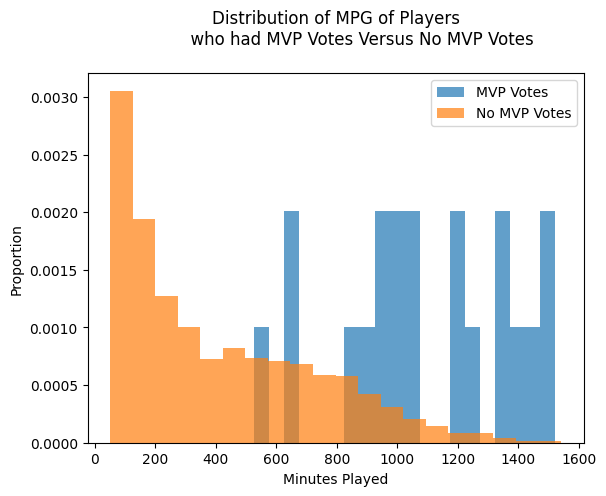

The cutoff is 222.206 minutes per game


In [46]:
mvp = df[df['MVPTF'] == 1]
non_mvp = df[df['MVPTF'] == 0]

plt.hist(mvp["G"], bins = 20, alpha = 0.7, density=True, label = "MVP Votes")
plt.hist(non_mvp["G"], bins = 20, alpha = 0.7, density=True, label = "No MVP Votes")
plt.ylabel("Proportion")
plt.xlabel("Minutes Played")
plt.title("""Distribution of MPG of Players
          who had MVP Votes Versus No MVP Votes
          """)
plt.legend()
plt.show()

mp_cutoff = mvp["G"].mean() - 3*mvp["G"].std()
print(f"The cutoff is {mp_cutoff:.3f} minutes per game")

In [47]:
mvp.head()

,Player,From,To,Years,Pos,Height,Wt,G,PTS,TRB,...,DPOY,ROY,AS MVP,CF MVP,Finals MVP,MVP,Championships,NBA 75 Team,ABA All-Time Team,MVPTF
116,Giannis Antetokounmpo,2014,2022,9,G-F,6.916667,242.0,656,21.8,9.4,...,1,0,1,0,1,2,1,1,0,1
220,Charles Barkley*,1985,2000,16,F,6.500000,252.0,1073,22.1,11.7,...,0,0,1,0,0,1,0,1,0,1
591,Kobe Bryant*,1997,2016,20,G-F,6.500000,212.0,1346,25.0,5.2,...,0,0,4,0,2,1,5,1,0,1
961,Stephen Curry,2010,2022,13,G,6.166667,185.0,826,24.3,4.6,...,0,0,1,1,1,2,4,1,0,1
1192,Tim Duncan*,1998,2016,19,F-C,6.916667,250.0,1392,19.0,10.8,...,0,1,1,0,3,2,5,1,0,1


##Comparisons

Comparisons of different columns based on the MVP status.

<ipython-input-48-db619229cab7>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




<Axes: xlabel='MVPTF', ylabel='PTS'>

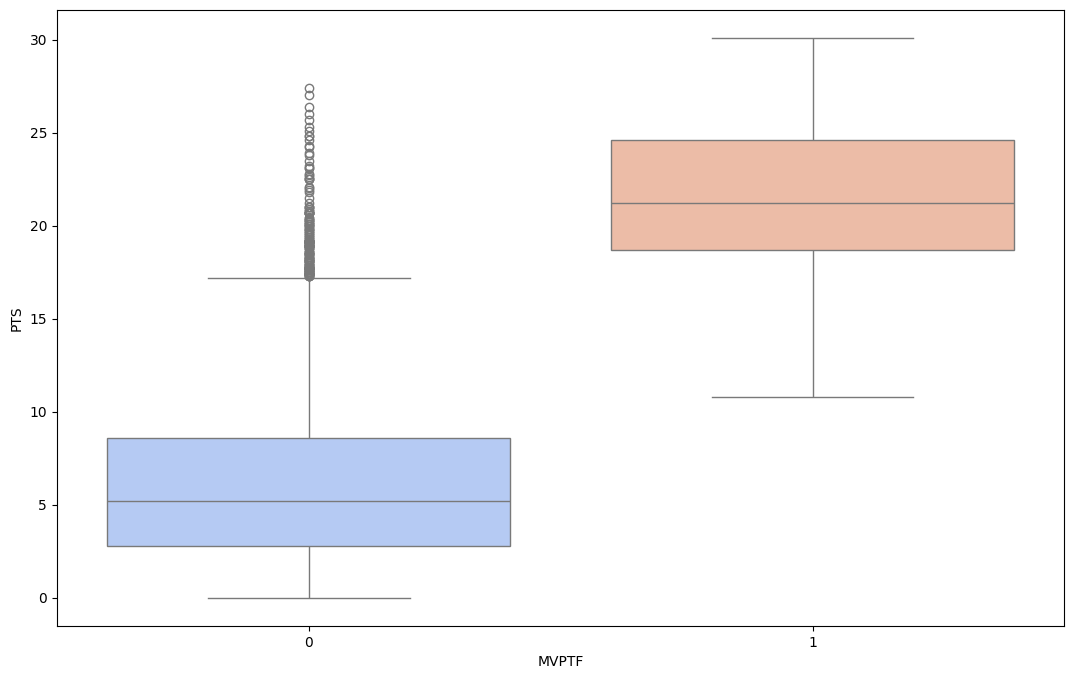

In [48]:
fig, ax = plt.subplots(figsize=(13,8))
sns.boxplot(x='MVPTF',y='PTS',data=cleaned_df,palette='coolwarm')

<ipython-input-49-e80384b5dfff>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




<Axes: xlabel='MVPTF', ylabel='All Star'>

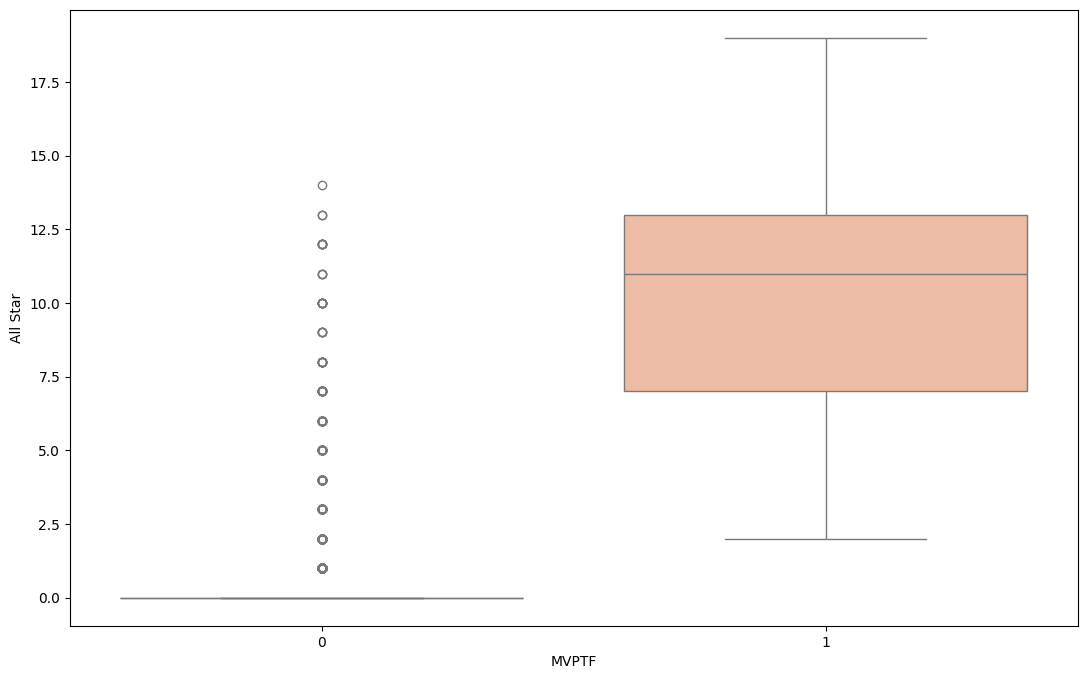

In [49]:
fig, ax = plt.subplots(figsize=(13,8))
sns.boxplot(x='MVPTF',y='All Star',data=cleaned_df,palette='coolwarm')

<ipython-input-50-58ab5259186e>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




<Axes: xlabel='MVPTF', ylabel='G'>

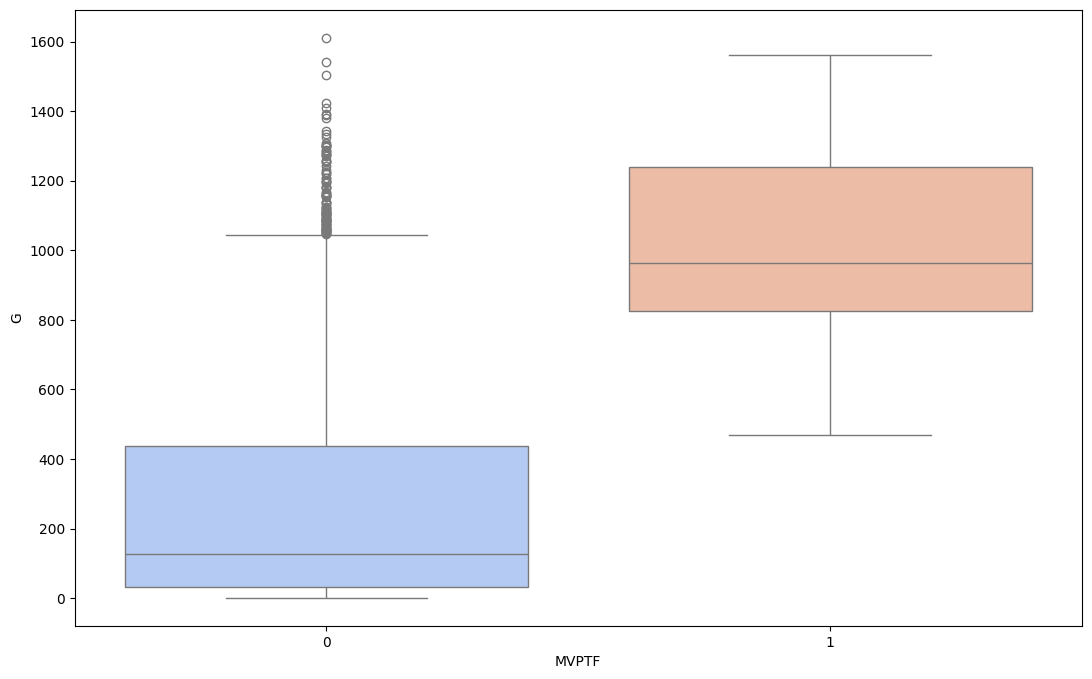

In [50]:
fig, ax = plt.subplots(figsize=(13,8))
sns.boxplot(x='MVPTF',y='G',data=cleaned_df,palette='coolwarm')

<ipython-input-51-7b2acd962596>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




<Axes: xlabel='MVPTF', ylabel='AST'>

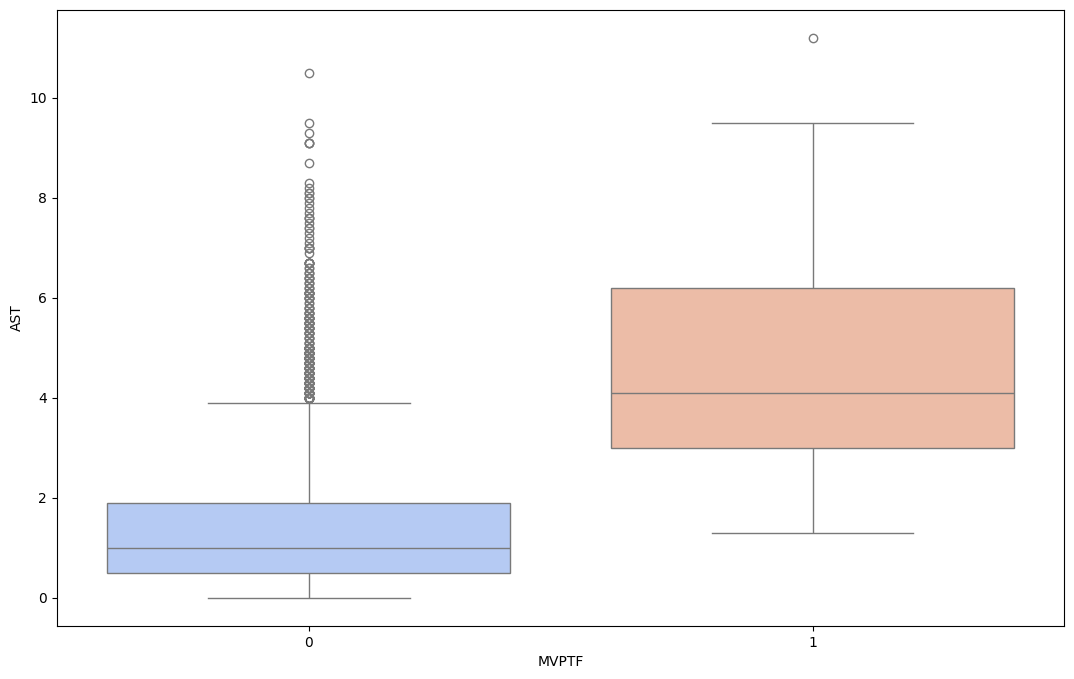

In [51]:
fig, ax = plt.subplots(figsize=(13,8))
sns.boxplot(x='MVPTF',y='AST',data=cleaned_df,palette='coolwarm')

<ipython-input-52-87294cb7ef1d>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




<Axes: xlabel='MVPTF', ylabel='TRB'>

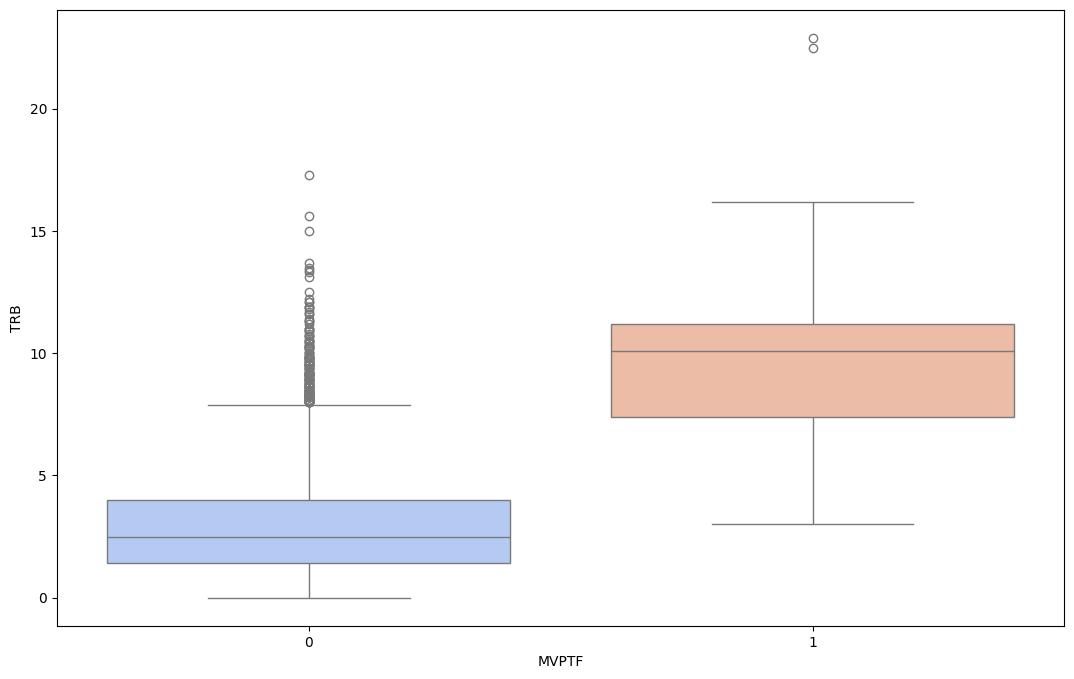

In [52]:
fig, ax = plt.subplots(figsize=(13,8))
sns.boxplot(x='MVPTF',y='TRB',data=cleaned_df,palette='coolwarm')

<ipython-input-53-eed649f44223>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




<Axes: xlabel='MVPTF', ylabel='From'>

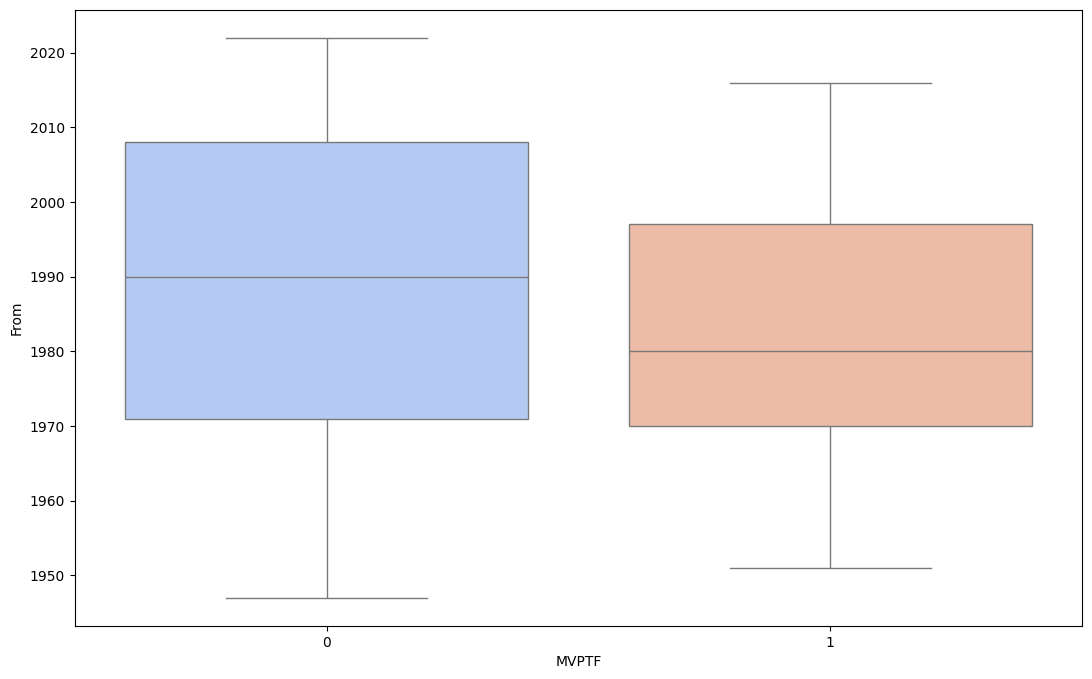

In [53]:
fig, ax = plt.subplots(figsize=(13,8))
sns.boxplot(x='MVPTF',y='From',data=cleaned_df,palette='coolwarm')

##Regression


In [54]:
young = df[df['Years']<12]
old = df[df['Years']>=12]

x_train = young.drop(['Player', 'From', 'To', 'Pos','MVPTF'], axis=1)
y_train = young['MVPTF']
x_test = old.drop(['Player', 'From', 'To', 'Pos','MVPTF'], axis=1)
y_test = old['MVPTF']

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train, y_train)
pred_knn = knn.predict(x_test)
knn_prob = knn.predict_proba(x_test)[:,1]

logmodel = LogisticRegression(max_iter=2000)
logmodel.fit(x_train, y_train)
pred_log = logmodel.predict(x_test)
log_prob = logmodel.predict_proba(x_test)[:,1]

rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(x_train, y_train)
pred_rfc = rfc.predict(x_test)
rfc_prob = rfc.predict_proba(x_test)[:,1]

print('Logistic Regression')
print(confusion_matrix(y_test, pred_log))
print(classification_report(y_test, pred_log))

print('Random Forest')
print(confusion_matrix(y_test, pred_rfc))
print(classification_report(y_test, pred_rfc))

print('K Nearest Neighbor')
print(confusion_matrix(y_test, pred_knn))
print(classification_report(y_test, pred_knn))

Logistic Regression
[[403  40]
 [  2  16]]
              precision    recall  f1-score   support

           0       1.00      0.91      0.95       443
           1       0.29      0.89      0.43        18

    accuracy                           0.91       461
   macro avg       0.64      0.90      0.69       461
weighted avg       0.97      0.91      0.93       461

Random Forest
[[443   0]
 [ 18   0]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       443
           1       0.00      0.00      0.00        18

    accuracy                           0.96       461
   macro avg       0.48      0.50      0.49       461
weighted avg       0.92      0.96      0.94       461

K Nearest Neighbor
[[443   0]
 [ 18   0]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       443
           1       0.00      0.00      0.00        18

    accuracy                           0.96       461
   mac

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` p

In [55]:
print(young[young['MVPTF'] == 1])
print(old[old['MVPTF'] == 1])

                     Player  From    To  Years  Pos    Height     Wt    G  \
116   Giannis Antetokounmpo  2014  2022      9  G-F  6.916667  242.0  656   
2272           Nikola Jokić  2016  2022      7  F-C  6.916667  284.0  527   

       PTS   TRB  ...  DPOY  ROY  AS MVP  CF MVP  Finals MVP  MVP  \
116   21.8   9.4  ...     1    0       1       0           1    2   
2272  19.7  10.4  ...     0    0       0       0           0    2   

      Championships  NBA 75 Team  ABA All-Time Team  MVPTF  
116               1            1                  0      1  
2272              0            0                  0      1  

[2 rows x 39 columns]
                 Player  From    To  Years  Pos    Height     Wt     G   PTS  \
220    Charles Barkley*  1985  2000     16    F  6.500000  252.0  1073  22.1   
591        Kobe Bryant*  1997  2016     20  G-F  6.500000  212.0  1346  25.0   
961       Stephen Curry  2010  2022     13    G  6.166667  185.0   826  24.3   
1192        Tim Duncan*  1998  201

In [59]:
x_train_encoded = pd.get_dummies(x_train)
x_test_encoded = pd.get_dummies(x_test)

In [60]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train_encoded, y_train)
pred_knn = knn.predict(x_test_encoded)
knn_prob = knn.predict_proba(x_test_encoded)[:,1]

In [61]:
print(y_train.unique())

[0 1]


In [63]:
df['MVPTF'] = df['MVPTF'].astype(int)

In [64]:
print(y_train.value_counts())
print(y_test.value_counts())


MVPTF
0    1610
1       2
Name: count, dtype: int64
MVPTF
0    443
1     18
Name: count, dtype: int64


In [65]:
logmodel = LogisticRegression(max_iter=2000)
logmodel.fit(x_train_encoded, y_train)
pred_log = logmodel.predict(x_test_encoded)
log_prob = logmodel.predict_proba(x_test)[:,1]

print('Logistic Regression')
print(confusion_matrix(y_test, pred_log))
print(classification_report(y_test, pred_log))

Logistic Regression
[[403  40]
 [  2  16]]
              precision    recall  f1-score   support

           0       1.00      0.91      0.95       443
           1       0.29      0.89      0.43        18

    accuracy                           0.91       461
   macro avg       0.64      0.90      0.69       461
weighted avg       0.97      0.91      0.93       461



In [66]:
physical = df[df['Years']<12]
playstyle = df[df['Years']>=12]

x_train = physical.drop(['Player', 'From', 'To', 'Pos','MVPTF'], axis=1)
y_train = physical['MVPTF']
x_test = playstyle.drop(['Player', 'From', 'To', 'Pos','MVPTF'], axis=1)
y_test = playstyle['MVPTF']

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train, y_train)
pred_knn = knn.predict(x_test)
knn_prob = knn.predict_proba(x_test)[:,1]

logmodel = LogisticRegression(max_iter=2000)
logmodel.fit(x_train, y_train)
pred_log = logmodel.predict(x_test)
log_prob = logmodel.predict_proba(x_test)[:,1]

rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(x_train, y_train)
pred_rfc = rfc.predict(x_test)
rfc_prob = rfc.predict_proba(x_test)[:,1]

print('Logistic Regression')
print(confusion_matrix(y_test, pred_log))
print(classification_report(y_test, pred_log))

print('Random Forest')
print(confusion_matrix(y_test, pred_rfc))
print(classification_report(y_test, pred_rfc))

print('K Nearest Neighbor')
print(confusion_matrix(y_test, pred_knn))
print(classification_report(y_test, pred_knn))

Logistic Regression
[[403  40]
 [  2  16]]
              precision    recall  f1-score   support

           0       1.00      0.91      0.95       443
           1       0.29      0.89      0.43        18

    accuracy                           0.91       461
   macro avg       0.64      0.90      0.69       461
weighted avg       0.97      0.91      0.93       461

Random Forest
[[443   0]
 [ 18   0]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       443
           1       0.00      0.00      0.00        18

    accuracy                           0.96       461
   macro avg       0.48      0.50      0.49       461
weighted avg       0.92      0.96      0.94       461

K Nearest Neighbor
[[443   0]
 [ 18   0]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       443
           1       0.00      0.00      0.00        18

    accuracy                           0.96       461
   mac

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` p

## Working regression

In [ ]:
x = df.drop(['MVPTF'], axis=1)
y = df['MVPTF']

X_train, X_test, y_train, y_test = train_test_split(x.drop(['Player', 'From', 'To', 'Pos'], axis=1), y, test_size=0.4, random_state=42)

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
pred_knn = knn.predict(X_test)
knn_prob = knn.predict_proba(X_test)[:,1]

logmodel = LogisticRegression(max_iter=2000)
logmodel.fit(X_train, y_train)
pred_log = logmodel.predict(X_test)
log_prob = logmodel.predict_proba(X_test)[:,1]

rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)
rfc_prob = rfc.predict_proba(X_test)[:,1]

print('Logistic Regression')
print(confusion_matrix(y_test, pred_log))
print(classification_report(y_test, pred_log))

print('Random Forest')
print(confusion_matrix(y_test, pred_rfc))
print(classification_report(y_test, pred_rfc))

print('K Nearest Neighbor')
print(confusion_matrix(y_test, pred_knn))
print(classification_report(y_test, pred_knn))

Logistic Regression:

- Precision for the positive class (True) is 0.71, which means that out of all instances predicted as positive, 71% are actually positive.
- Recall for the positive class is 0.62, indicating that the model correctly identifies 62% of all actual positives.
- F1-score, which is the harmonic mean of precision and recall, is 0.67.

Random Forest:

- Precision for the positive class is 0.86, higher than that of Logistic Regression.
- Recall for the positive class is 0.75, indicating that the model correctly identifies 75% of all actual positives.
- F1-score is 0.80, indicating a good balance between precision and recall.

K Nearest Neighbor (KNN):

- Precision for the positive class is 0.75.
- Recall for the positive class is 0.38, which is lower compared to the other models.
- F1-score is 0.50.

In summary, the Random Forest model appears to have the best overall performance based on the F1-score and other metrics. However, it's essential to consider the specific requirements and constraints of your problem when selecting the best model for deployment. Additionally, you might want to further tune the models or explore other algorithms to improve performance.

### Useless testing

In [ ]:
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

In [ ]:
print("Length of X_train:", len(X_train))
print("Length of y_train:", len(y_train))
print("Length of X_test:", len(X_test))
print("Length of y_test:", len(y_test))

In [ ]:
print("Missing values in x_train:", x_train.isnull().sum())
print("Missing values in y_train:", y_train.isnull().sum())

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Define class weights
class_weights = {0: 1, 1: 10}  # Adjust the weights based on the class imbalance

# Initialize and train the classifier with class weights
rf_classifier = RandomForestClassifier(class_weight=class_weights)
rf_classifier.fit(X_train, y_train)

# Make predictions
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

In [ ]:
df1 = df.drop(['Player', 'From', 'To', 'Pos'], axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x.drop(['Player', 'From', 'To', 'Pos'], axis=1), y, test_size=0.4, random_state=42)

# Define class weights
class_weights = {0: 1, 1: 10}  # Adjust the weights based on the class imbalance

# Initialize and train the classifier with class weights
rf_classifier = RandomForestClassifier(class_weight=class_weights)
rf_classifier.fit(X_train, y_train)

# Make predictions
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

df_correlation = df.drop(['Player', 'From', 'To', 'Pos'], axis=1)

def plot_correlation(df_correlation, target_column):
    # Calculate correlation matrix
    corr_matrix = df_correlation.corr()

    # Get correlations with the target column
    target_corr = corr_matrix[target_column].sort_values(ascending=False)

    # Select top correlated features
    top_features = target_corr[target_corr.abs() > 0.4].index.tolist()

    # Create a heatmap
    plt.figure(figsize=(12, 10))
    sns.heatmap(df_correlation[top_features].corr(), annot=True, cmap='coolwarm', fmt=".2f")
    plt.title(f'Correlation Heatmap with respect to {target_column}')
    plt.show()

# Assuming 'df' is your DataFrame and 'MVPTF' is your target column
plot_correlation(df_correlation, 'MVPTF')